1. Gerekli kütüphaneler

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

2. Veriyi okuma

In [2]:
# Eğitim ve test verilerini oku
train_df = pd.read_csv("../datasets/normal/train_mental.csv")
test_df = pd.read_csv("../datasets/normal/test_mental.csv")

# Özellik ve hedef ayır (✅ doğru hedef sütunu kullanılıyor)
X_train = train_df.drop("support_needed", axis=1)
y_train = train_df["support_needed"]

X_test = test_df.drop("support_needed", axis=1)
y_test = test_df["support_needed"]

print("✅ Eğitim verisi:", X_train.shape)
print("✅ Test verisi:", X_test.shape)
print("🎯 Sınıf dağılımı (y_train):\n", y_train.value_counts())

✅ Eğitim verisi: (1007, 23)
✅ Test verisi: (252, 23)
🎯 Sınıf dağılımı (y_train):
 support_needed
0    528
1    479
Name: count, dtype: int64


3. SMOTE ile veri dengeleme

In [3]:
# 1. Veriyi standardize et
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. SMOTE ile dengele
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print("📊 SMOTE sonrası sınıf dağılımı:", Counter(y_train_balanced))

📊 SMOTE sonrası sınıf dağılımı: Counter({0: 528, 1: 528})


4. SVM Modeli

In [4]:
# SVM modeli tanımla (probability=True ROC için gerekli)
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

SVC(probability=True, random_state=42)

5. Tahmin

In [5]:
# Tahmin yap
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

6. Değerlendirme

📋 Sınıflandırma Raporu (SVM):

              precision    recall  f1-score   support

           0      0.886     0.826     0.855       132
           1      0.822     0.883     0.851       120

    accuracy                          0.853       252
   macro avg      0.854     0.855     0.853       252
weighted avg      0.855     0.853     0.853       252



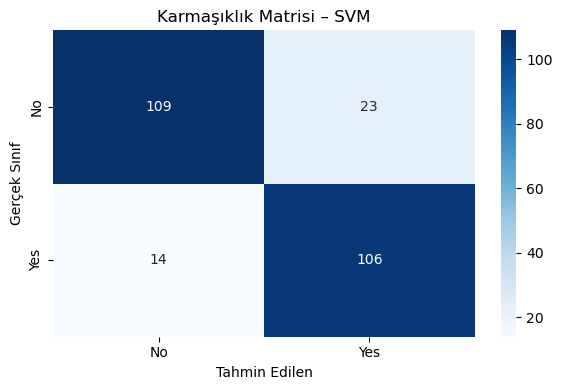

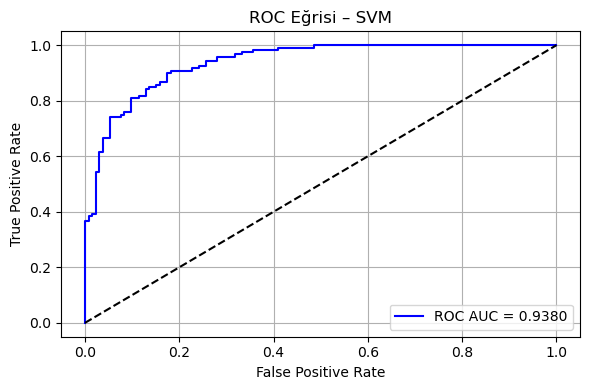

In [6]:
# 📋 Sınıflandırma raporu
print("📋 Sınıflandırma Raporu (SVM):\n")
report = classification_report(y_test, y_pred, digits=3)  # 3 basamak hassasiyeti
print(report)

# 🔍 Karmaşıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karmaşıklık Matrisi – SVM")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# 🌈 ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}", color="blue")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – SVM")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

7. Model kaydı

In [7]:
import joblib

# model.save("../saved_model/normal/mental_svm_model.keras")
joblib.dump(model, "../saved_model/normal/mental_svm_model.pkl")

print("💾 Model başarıyla kaydedildi:")
print("- mental_svm_model.pkl")

💾 Model başarıyla kaydedildi:
- mental_svm_model.pkl
